# Proyek Analisis Data: Air-Quality-Dataset
- **Nama:** Muhammad Gus Nadir
- **Email:** mgusnadir@gmail.com
- **ID Dicoding:** mgusnadir

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren polusi udara (dengan menggunakan parameter PM2.5) di stasiun Shunyi selama beberapa tahun terakhir ?

2. Apa pengaruh kondisi cuaca seperti kecepatan angin (WSPM) dan hujan (RAIN) terhadap tingkat polusi udara (PM2.5) di stasiun Shunyi?

## Import Semua Packages/Library yang Digunakan

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Mengambil Data PRSA Shunyi

In [229]:
shunyi_df = pd.read_csv("data/Shunyi.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


### Assessing Data

#### Menilai Data PRSA Shunyi

In [230]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dapat dilihat terdapat missing value pada beberapa kolom.

In [231]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Melakukan Pengecekan data duplikasi

In [232]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa parameter statistik dari kolom numerik yang ada di data frame shunyi

In [233]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


### Cleaning Data

#### Menangani Missing Value Kolom PM2.5

In [234]:
shunyi_df[shunyi_df['PM2.5'].isna()]


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
204,205,2013,3,9,12,NaN,NaN,NaN,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,NaN,NaN,NaN,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
206,207,2013,3,9,14,NaN,NaN,NaN,NaN,NaN,90.0,9.8,1010.4,-17.4,0.0,NW,6.2,Shunyi
207,208,2013,3,9,15,NaN,NaN,NaN,NaN,NaN,90.0,9.7,1011.7,-17.5,0.0,NNW,5.9,Shunyi
208,209,2013,3,9,16,NaN,NaN,NaN,NaN,NaN,90.0,10.3,1013.1,-17.9,0.0,NNW,6.2,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi
34936,34937,2017,2,23,16,NaN,NaN,2.0,14.0,300.0,84.0,8.1,1022.5,-15.5,0.0,WNW,3.9,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [235]:
shunyi_df['PM2.5'].value_counts()


PM2.5
3.0      824
8.0      637
10.0     624
9.0      591
7.0      577
        ... 
445.0      1
467.0      1
428.0      1
443.0      1
593.0      1
Name: count, Length: 567, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '3.0'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [236]:
shunyi_df['PM2.5'].fillna(value=3.0, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\429231009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['PM2.5'].fillna(value=3.0, inplace=True)


In [237]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

#### Menangani Missing Value Kolom PM10

In [238]:
shunyi_df[shunyi_df['PM10'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
31,32,2013,3,2,7,13.0,NaN,12.0,31.0,700.0,49.0,-2.7,1032.3,-16.4,0.0,N,1.3,Shunyi
88,89,2013,3,4,16,13.0,NaN,8.0,21.0,500.0,84.0,14.9,1017.9,-13.3,0.0,SSW,3.0,Shunyi
204,205,2013,3,9,12,3.0,NaN,NaN,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,3.0,NaN,NaN,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
206,207,2013,3,9,14,3.0,NaN,NaN,NaN,NaN,90.0,9.8,1010.4,-17.4,0.0,NW,6.2,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,3.0,NaN,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,3.0,NaN,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,3.0,NaN,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi
34936,34937,2017,2,23,16,3.0,NaN,2.0,14.0,300.0,84.0,8.1,1022.5,-15.5,0.0,WNW,3.9,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [239]:
shunyi_df['PM10'].value_counts()

PM10
6.0      648
5.0      431
14.0     394
13.0     383
12.0     372
        ... 
59.3       1
33.5       1
26.6       1
42.7       1
789.0      1
Name: count, Length: 605, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '6.0'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [240]:
shunyi_df['PM10'].fillna(value=6.0, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\3329703155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['PM10'].fillna(value=6.0, inplace=True)


In [241]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

#### Menangani Missing Value Kolom SO2

In [242]:
shunyi_df[shunyi_df['SO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
98,99,2013,3,5,2,93.0,106.0,NaN,5.0,200.0,84.0,2.2,1017.0,-10.7,0.0,NNE,1.7,Shunyi
194,195,2013,3,9,2,64.0,93.0,NaN,5.0,200.0,90.0,2.5,996.6,-3.8,0.0,WNW,1.7,Shunyi
204,205,2013,3,9,12,3.0,6.0,NaN,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,3.0,6.0,NaN,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,3.0,6.0,NaN,NaN,NaN,NaN,-2.5,1029.4,-14.9,0.0,NE,0.9,Shunyi
34880,34881,2017,2,21,8,3.0,6.0,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,3.0,6.0,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,3.0,6.0,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [243]:
shunyi_df['SO2'].value_counts()

SO2
2.0000      10335
3.0000       3202
4.0000       1689
5.0000       1272
6.0000       1122
            ...  
128.0000        1
9.9960          1
140.0000        1
12.2808         1
239.0000        1
Name: count, Length: 267, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '2.0000'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [244]:
shunyi_df['SO2'].fillna(value=2.0000, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\3373535504.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['SO2'].fillna(value=2.0000, inplace=True)


In [245]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

#### Menangani Missing Value Kolom NO2

In [246]:
shunyi_df[shunyi_df['NO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
100,101,2013,3,5,4,110.0,133.0,5.0,NaN,200.0,84.0,0.2,1016.4,-9.0,0.0,NNE,1.7,Shunyi
196,197,2013,3,9,4,119.0,131.0,7.0,NaN,100.0,90.0,1.4,994.3,-3.5,0.0,WSW,0.8,Shunyi
204,205,2013,3,9,12,3.0,6.0,2.0,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,3.0,6.0,2.0,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,3.0,6.0,2.0,NaN,NaN,NaN,-2.5,1029.4,-14.9,0.0,NE,0.9,Shunyi
34880,34881,2017,2,21,8,3.0,6.0,2.0,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,3.0,6.0,2.0,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,3.0,6.0,2.0,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [247]:
shunyi_df['NO2'].value_counts()

NO2
10.0000     640
13.0000     579
11.0000     573
12.0000     571
9.0000      557
           ... 
55.4310       1
69.1861       1
8.8279        1
62.4112       1
184.0000      1
Name: count, Length: 517, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '10.0000'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [248]:
shunyi_df['NO2'].fillna(value=10.0000, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\454333294.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['NO2'].fillna(value=10.0000, inplace=True)


In [249]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

#### Menangani Missing Value Kolom CO

In [250]:
shunyi_df[shunyi_df['CO'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,12.0,12.0,3.0000,5.0000,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
99,100,2013,3,5,3,98.0,116.0,5.0000,4.0000,NaN,84.0,0.5,1016.7,-8.2,0.0,NNE,0.2,Shunyi
120,121,2013,3,6,0,200.0,208.0,79.6824,97.7228,NaN,61.0,4.5,1011.1,-5.0,0.0,NNW,0.7,Shunyi
131,132,2013,3,6,11,164.0,174.0,87.1080,75.7557,NaN,61.0,9.1,1010.5,-5.6,0.0,N,2.1,Shunyi
178,179,2013,3,8,10,174.0,196.0,74.2560,62.6165,NaN,98.0,16.8,1003.4,-1.4,0.0,SE,2.1,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,3.0,6.0,2.0000,10.0000,NaN,NaN,-2.5,1029.4,-14.9,0.0,NE,0.9,Shunyi
34880,34881,2017,2,21,8,3.0,6.0,2.0000,10.0000,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,3.0,6.0,2.0000,10.0000,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,3.0,6.0,2.0000,10.0000,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [251]:
shunyi_df['CO'].value_counts()

CO
300.0     2881
400.0     2563
200.0     2282
500.0     2239
600.0     2135
          ... 
9800.0       1
4299.0       1
4799.0       1
4599.0       1
8200.0       1
Name: count, Length: 115, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '300.0'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [252]:
shunyi_df['CO'].fillna(value=300.0, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\1009626210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['CO'].fillna(value=300.0, inplace=True)


In [253]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

#### Menangani Missing Value Kolom O3

In [254]:
shunyi_df[shunyi_df['O3'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,12.0,12.0,3.0000,5.0,300.0,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
483,484,2013,3,21,3,88.0,76.0,3.0000,4.0,300.0,NaN,0.5,1011.7,-4.2,0.0,SE,1.4,Shunyi
484,485,2013,3,21,4,74.0,92.0,3.0000,4.0,100.0,NaN,0.0,1011.1,-4.3,0.0,SE,1.0,Shunyi
578,579,2013,3,25,2,79.0,142.0,10.0000,79.0,300.0,NaN,0.4,1019.9,-5.6,0.0,SE,2.5,Shunyi
579,580,2013,3,25,3,67.0,119.0,3.7128,9.0,300.0,NaN,-0.2,1020.0,-5.8,0.0,SSE,2.1,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,3.0,6.0,2.0000,10.0,300.0,NaN,-2.5,1029.4,-14.9,0.0,NE,0.9,Shunyi
34880,34881,2017,2,21,8,3.0,6.0,2.0000,10.0,300.0,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,3.0,6.0,2.0000,10.0,300.0,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,3.0,6.0,2.0000,10.0,300.0,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [255]:
shunyi_df['O3'].value_counts()

O3
2.0000      3478
4.0000       774
3.0000       714
5.0000       611
6.0000       550
            ... 
13.4946        1
50.1228        1
16.9218        1
80.9676        1
311.0000       1
Name: count, Length: 961, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '2.0000'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [256]:
shunyi_df['O3'].fillna(value=2.0000, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\2095695285.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['O3'].fillna(value=2.0000, inplace=True)


In [257]:
shunyi_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP        51
PRES        51
DEWP        54
RAIN        51
wd         483
WSPM        44
station      0
dtype: int64

#### Menangani Missing Value Kolom TEMP

In [258]:
shunyi_df[shunyi_df['TEMP'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16760,16761,2015,1,28,8,7.0,7.0,2.0,15.0,300.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16790,16791,2015,1,29,14,32.0,32.0,4.0,31.0,600.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16812,16813,2015,1,30,12,15.0,15.0,2.0,17.0,500.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16813,16814,2015,1,30,13,12.0,12.0,2.0,11.0,300.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16873,16874,2015,2,2,1,271.0,271.0,73.0,82.0,4500.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16907,16908,2015,2,3,11,225.0,225.0,53.0,90.0,2800.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16930,16931,2015,2,4,10,22.0,28.0,6.0,40.0,600.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16932,16933,2015,2,4,12,16.0,16.0,2.0,20.0,400.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16934,16935,2015,2,4,14,19.0,19.0,2.0,18.0,300.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi
16982,16983,2015,2,6,14,27.0,27.0,18.0,29.0,500.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [259]:
shunyi_df['TEMP'].value_counts()

TEMP
 3.000    227
-2.000    213
 1.000    203
 0.000    199
-1.000    195
         ... 
 4.675      1
 4.260      1
 2.550      1
 1.725      1
-0.650      1
Name: count, Length: 985, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '3.000'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [260]:
shunyi_df['TEMP'].fillna(value=3.000, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\3411949538.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['TEMP'].fillna(value=3.000, inplace=True)


In [261]:
shunyi_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES        51
DEWP        54
RAIN        51
wd         483
WSPM        44
station      0
dtype: int64

#### Menangani Missing Value Kolom PRES

In [262]:
shunyi_df[shunyi_df['PRES'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16760,16761,2015,1,28,8,7.0,7.0,2.0,15.0,300.0,48.0,3.0,NaN,NaN,NaN,NaN,NaN,Shunyi
16790,16791,2015,1,29,14,32.0,32.0,4.0,31.0,600.0,58.0,3.0,NaN,NaN,NaN,NaN,NaN,Shunyi
16812,16813,2015,1,30,12,15.0,15.0,2.0,17.0,500.0,63.0,3.0,NaN,NaN,NaN,NaN,NaN,Shunyi
16813,16814,2015,1,30,13,12.0,12.0,2.0,11.0,300.0,70.0,3.0,NaN,NaN,NaN,NaN,NaN,Shunyi
16873,16874,2015,2,2,1,271.0,271.0,73.0,82.0,4500.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,Shunyi
16907,16908,2015,2,3,11,225.0,225.0,53.0,90.0,2800.0,23.0,3.0,NaN,NaN,NaN,NaN,NaN,Shunyi
16930,16931,2015,2,4,10,22.0,28.0,6.0,40.0,600.0,45.0,3.0,NaN,NaN,NaN,NaN,NaN,Shunyi
16932,16933,2015,2,4,12,16.0,16.0,2.0,20.0,400.0,62.0,3.0,NaN,NaN,NaN,NaN,NaN,Shunyi
16934,16935,2015,2,4,14,19.0,19.0,2.0,18.0,300.0,64.0,3.0,NaN,NaN,NaN,NaN,NaN,Shunyi
16982,16983,2015,2,6,14,27.0,27.0,18.0,29.0,500.0,68.0,3.0,NaN,NaN,NaN,NaN,NaN,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [263]:
shunyi_df['PRES'].value_counts()

PRES
1015.0    270
1017.0    259
1014.0    253
1018.0    251
1020.0    244
         ... 
1039.6      1
1040.9      1
1042.4      1
1042.2      1
1037.6      1
Name: count, Length: 602, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '1015.0'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [264]:
shunyi_df['PRES'].fillna(value=1015.0, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\823806076.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['PRES'].fillna(value=1015.0, inplace=True)


In [265]:
shunyi_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP        54
RAIN        51
wd         483
WSPM        44
station      0
dtype: int64

#### Menangani Missing Value Kolom DEWP

In [266]:
shunyi_df[shunyi_df['DEWP'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2906,2907,2013,6,30,2,159.0,133.0,3.0,65.0,2299.0,2.0,21.8,1000.8,NaN,0.0,WNW,0.0,Shunyi
2907,2908,2013,6,30,3,148.0,126.0,3.0,60.0,2399.0,2.0,21.5,1000.7,NaN,0.0,ESE,0.0,Shunyi
2908,2909,2013,6,30,4,134.0,111.0,3.0,51.0,2399.0,2.0,21.5,1001.4,NaN,0.0,S,0.8,Shunyi
16760,16761,2015,1,28,8,7.0,7.0,2.0,15.0,300.0,48.0,3.0,1015.0,NaN,NaN,NaN,NaN,Shunyi
16790,16791,2015,1,29,14,32.0,32.0,4.0,31.0,600.0,58.0,3.0,1015.0,NaN,NaN,NaN,NaN,Shunyi
16812,16813,2015,1,30,12,15.0,15.0,2.0,17.0,500.0,63.0,3.0,1015.0,NaN,NaN,NaN,NaN,Shunyi
16813,16814,2015,1,30,13,12.0,12.0,2.0,11.0,300.0,70.0,3.0,1015.0,NaN,NaN,NaN,NaN,Shunyi
16873,16874,2015,2,2,1,271.0,271.0,73.0,82.0,4500.0,10.0,3.0,1015.0,NaN,NaN,NaN,NaN,Shunyi
16907,16908,2015,2,3,11,225.0,225.0,53.0,90.0,2800.0,23.0,3.0,1015.0,NaN,NaN,NaN,NaN,Shunyi
16930,16931,2015,2,4,10,22.0,28.0,6.0,40.0,600.0,45.0,3.0,1015.0,NaN,NaN,NaN,NaN,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [267]:
shunyi_df['DEWP'].value_counts()

DEWP
 17.6    157
 16.2    139
 16.8    139
 17.7    138
 17.5    137
        ... 
-30.8      1
-32.2      1
-33.1      1
-34.3      1
 27.5      1
Name: count, Length: 608, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '17.6'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [268]:
shunyi_df['DEWP'].fillna(value=17.6, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\1418483945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['DEWP'].fillna(value=17.6, inplace=True)


In [269]:
shunyi_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN        51
wd         483
WSPM        44
station      0
dtype: int64

#### Menangani Missing Value Kolom RAIN

In [270]:
shunyi_df[shunyi_df['RAIN'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16760,16761,2015,1,28,8,7.0,7.0,2.0,15.0,300.0,48.0,3.0,1015.0,17.6,NaN,NaN,NaN,Shunyi
16790,16791,2015,1,29,14,32.0,32.0,4.0,31.0,600.0,58.0,3.0,1015.0,17.6,NaN,NaN,NaN,Shunyi
16812,16813,2015,1,30,12,15.0,15.0,2.0,17.0,500.0,63.0,3.0,1015.0,17.6,NaN,NaN,NaN,Shunyi
16813,16814,2015,1,30,13,12.0,12.0,2.0,11.0,300.0,70.0,3.0,1015.0,17.6,NaN,NaN,NaN,Shunyi
16873,16874,2015,2,2,1,271.0,271.0,73.0,82.0,4500.0,10.0,3.0,1015.0,17.6,NaN,NaN,NaN,Shunyi
16907,16908,2015,2,3,11,225.0,225.0,53.0,90.0,2800.0,23.0,3.0,1015.0,17.6,NaN,NaN,NaN,Shunyi
16930,16931,2015,2,4,10,22.0,28.0,6.0,40.0,600.0,45.0,3.0,1015.0,17.6,NaN,NaN,NaN,Shunyi
16932,16933,2015,2,4,12,16.0,16.0,2.0,20.0,400.0,62.0,3.0,1015.0,17.6,NaN,NaN,NaN,Shunyi
16934,16935,2015,2,4,14,19.0,19.0,2.0,18.0,300.0,64.0,3.0,1015.0,17.6,NaN,NaN,NaN,Shunyi
16982,16983,2015,2,6,14,27.0,27.0,18.0,29.0,500.0,68.0,3.0,1015.0,17.6,NaN,NaN,NaN,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [271]:
shunyi_df['RAIN'].value_counts()

RAIN
0.0     33702
0.1       302
0.2       143
0.3       101
0.4        84
        ...  
5.7         1
18.8        1
6.6         1
14.4        1
11.9        1
Name: count, Length: 120, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '0.0'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [272]:
shunyi_df['RAIN'].fillna(value=0.0, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\1436461760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['RAIN'].fillna(value=0.0, inplace=True)


In [273]:
shunyi_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         483
WSPM        44
station      0
dtype: int64

#### Menangani Missing Value Kolom wd

In [274]:
shunyi_df[shunyi_df['wd'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6764,6765,2013,12,7,20,380.0,378.0,44.0,121.0,8500.0,4.0,-0.1,1016.7,-2.2,0.0,NaN,0.1,Shunyi
16416,16417,2015,1,14,0,215.0,215.0,36.0,86.0,2800.0,17.0,-4.0,1027.9,-8.1,0.0,NaN,0.9,Shunyi
16760,16761,2015,1,28,8,7.0,7.0,2.0,15.0,300.0,48.0,3.0,1015.0,17.6,0.0,NaN,NaN,Shunyi
16790,16791,2015,1,29,14,32.0,32.0,4.0,31.0,600.0,58.0,3.0,1015.0,17.6,0.0,NaN,NaN,Shunyi
16812,16813,2015,1,30,12,15.0,15.0,2.0,17.0,500.0,63.0,3.0,1015.0,17.6,0.0,NaN,NaN,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34872,34873,2017,2,21,0,3.0,6.0,2.0,10.0,300.0,2.0,-3.2,1030.6,-13.2,0.0,NaN,0.2,Shunyi
34903,34904,2017,2,22,7,82.0,82.0,4.0,56.0,1600.0,8.0,-3.4,1018.3,-5.3,0.0,NaN,0.1,Shunyi
34944,34945,2017,2,24,0,74.0,80.0,30.0,102.0,2100.0,2.0,-1.1,1022.8,-9.2,0.0,NaN,0.2,Shunyi
34946,34947,2017,2,24,2,71.0,86.0,24.0,99.0,2200.0,2.0,-2.3,1023.0,-8.0,0.0,NaN,0.0,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [275]:
shunyi_df['wd'].value_counts()

wd
NNE    4540
N      3877
NE     3351
SSE    2963
SE     2665
S      2613
NW     2446
WNW    2051
NNW    1656
SSW    1586
ENE    1416
ESE    1377
W      1177
E      1153
SW      973
WSW     737
Name: count, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah 'NNE'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [276]:
shunyi_df['wd'].fillna(value='NNE', inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\3860142139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['wd'].fillna(value='NNE', inplace=True)


In [277]:
shunyi_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM       44
station     0
dtype: int64

#### Menangani Missing Value Kolom WSPM

In [278]:
shunyi_df[shunyi_df['WSPM'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16760,16761,2015,1,28,8,7.0,7.0,2.0,15.0,300.0,48.0,3.0,1015.0,17.6,0.0,NNE,NaN,Shunyi
16790,16791,2015,1,29,14,32.0,32.0,4.0,31.0,600.0,58.0,3.0,1015.0,17.6,0.0,NNE,NaN,Shunyi
16812,16813,2015,1,30,12,15.0,15.0,2.0,17.0,500.0,63.0,3.0,1015.0,17.6,0.0,NNE,NaN,Shunyi
16813,16814,2015,1,30,13,12.0,12.0,2.0,11.0,300.0,70.0,3.0,1015.0,17.6,0.0,NNE,NaN,Shunyi
16873,16874,2015,2,2,1,271.0,271.0,73.0,82.0,4500.0,10.0,3.0,1015.0,17.6,0.0,NNE,NaN,Shunyi
16907,16908,2015,2,3,11,225.0,225.0,53.0,90.0,2800.0,23.0,3.0,1015.0,17.6,0.0,NNE,NaN,Shunyi
16930,16931,2015,2,4,10,22.0,28.0,6.0,40.0,600.0,45.0,3.0,1015.0,17.6,0.0,NNE,NaN,Shunyi
16932,16933,2015,2,4,12,16.0,16.0,2.0,20.0,400.0,62.0,3.0,1015.0,17.6,0.0,NNE,NaN,Shunyi
16934,16935,2015,2,4,14,19.0,19.0,2.0,18.0,300.0,64.0,3.0,1015.0,17.6,0.0,NNE,NaN,Shunyi
16982,16983,2015,2,6,14,27.0,27.0,18.0,29.0,500.0,68.0,3.0,1015.0,17.6,0.0,NNE,NaN,Shunyi


Dapat dilihat baris tersebut masih mengandung bayak informasi penting di kolom lain, lebih baik untuk tidak dibuang. Saya akan menggunakan imputation untuk mengganti missing value di kolum tersebut.

In [279]:
shunyi_df['WSPM'].value_counts()

WSPM
1.1     1975
1.3     1915
1.2     1891
1.0     1831
1.4     1682
        ... 
10.9       1
10.7       1
9.9        1
12.8       1
11.0       1
Name: count, Length: 103, dtype: int64

Berdasarkan hasil tersebut dapat diketahui nilai paling dominan adalah '1.1'. Nilai ini akan saya gunakan untuk mengisi missing value tersebut.

In [280]:
shunyi_df['WSPM'].fillna(value=1.1, inplace=True)

C:\Users\mgusn\AppData\Local\Temp\ipykernel_23052\439946862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df['WSPM'].fillna(value=1.1, inplace=True)


In [281]:
shunyi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Data Berhasil dibersihkan

In [282]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


## Exploratory Data Analysis (EDA)

Sebelum melakukan eksplorasi kita harus mengetahui terlebih dahulu arti dari kolom-kolom data set ini
1. **No**:Merupakan nomor indeks atau identifikasi unik untuk setiap entri data. Biasanya digunakan untuk membantu dalam referensi dan pengindeksan data.
2. **year**:Menunjukkan tahun pengamatan polusi udara dilakukan. Digunakan untuk menyimpan informasi tahun pengukuran.
3. **month**:Mengindikasikan bulan pengamatan polusi udara dilakukan, diukur dalam format angka (1 hingga 12).
4. **day**:Menyimpan informasi tentang tanggal pengamatan polusi udara dilakukan, diukur dalam format angka.
5. **hour**:Menunjukkan jam pengamatan polusi udara dilakukan. Diukur dalam format angka 0 hingga 23.
6. **PM2.5**:Merupakan parameter yang mengukur konsentrasi partikulat matter (PM) dengan diameter 2.5 mikrometer atau lebih kecil dalam udara. Dinyatakan dalam mikrogram per meter kubik (µg/m³).
7. **PM10**:Parameter yang mengukur konsentrasi partikulat matter (PM) dengan diameter 10 mikrometer atau lebih kecil dalam udara. Dinyatakan dalam mikrogram per meter kubik (µg/m³).
8. **SO2**:Konsentrasi sulfur dioksida dalam udara, diukur dalam mikrogram per meter kubik (µg/m³).
9. **NO2**:Konsentrasi nitrogen dioksida dalam udara, diukur dalam mikrogram per meter kubik (µg/m³).
10. **CO**:Konsentrasi karbon monoksida dalam udara, diukur dalam mikrogram per meter kubik (µg/m³).
11. **O3**:Konsentrasi ozon dalam udara, diukur dalam mikrogram per meter kubik (µg/m³).
12. **TEMP**:Suhu udara, diukur dalam derajat Celsius (°C).
13. **PRES**:Tekanan udara, diukur dalam hektopascal (hPa).
14. **DEWP**:Titik embun, yaitu suhu di mana udara harus didinginkan untuk mencapai kelembapan relatif 100%. Diukur dalam derajat Celsius (°C).
15. **RAIN**: Jumlah hujan dalam jam pengamatan, diukur dalam milimeter (mm).
16. **wd**: Arah angin. Biasanya disajikan dalam bentuk singkatan (misalnya, NNW untuk Utara Laut Barat).
17. **WSPM**:Kecepatan angin, diukur dalam meter per detik (m/s).
18. **station**: Nama stasiun pengukuran polusi udara.

In [283]:
shunyi_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNE,NaN,Shunyi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,77.499906,97.287680,13.144325,42.588833,1131.964009,52.942116,13.37286,1013.064757,2.488344,0.061006,NaN,1.806645,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.087367,89.189216,19.330641,31.087278,1140.167077,54.757155,11.48206,10.170203,13.728882,0.761118,NaN,1.287252,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.80000,988.000000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,29.000000,2.000000,18.000000,400.000000,7.000000,3.00000,1004.700000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,52.000000,76.000000,4.569600,35.000000,800.000000,40.000000,14.40000,1012.800000,3.100000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,137.000000,16.000000,61.000000,1500.000000,76.000000,23.20000,1021.000000,15.200000,0.000000,NaN,2.300000,NaN


Jika melihat tabel tersebut kita belum bisa mengambil kesimpulan dengan baik, oleh karena itu saya akan mulai mengesplor lebih dalam terkait dengan PM2.5 untuk menjawab pertanyaan bisnis no.1

In [284]:
shunyi_df['PM2.5'].describe()

count    35064.000000
mean        77.499906
std         81.087367
min          2.000000
25%         17.000000
50%         52.000000
75%        109.000000
max        941.000000
Name: PM2.5, dtype: float64

Dengan merujuk pada standar BMKG Indonesia, kita dapat mengklasifikasikan tingkat keparahan polusi udara berdasarkan nilai PM2.5. Berikut adalah klasifikasi yang sesuai dengan parameter BMKG:

1. Baik: 0 – 15 µgram/m3
2. Sedang: 16 – 65 µgram/m3
3. Tidak Sehat: 66 – 150 µgram/m3
4. Sangat Tidak Sehat: 151 – 250 µgram/m3
5. Berbahaya: > 250 µgram/m3

Dari paramater tersebut dapat dilihat bahwa Kualitas Udara yang ada pada data stasiun Shunyi itu Tidak Sehat. Dengan melihat nilai minimum dan maksimum kita bisa tau bahwa pada suatu jam/hari/bulan tertentu ada yang kualitas udaranya baik dan juga ada yang sangat ekstrem sampai mencapai 941 µgram/m³

Kita bisa mengeksplore lebih jauh dengan mengelompokkan data kita dengan parameter tersebut.

In [285]:
def kategori_kualitas_udara(pm25):
    if pm25 <= 15:
        return 'Baik'
    elif 16 <= pm25 <= 65:
        return 'Sedang'
    elif 66 <= pm25 <= 150:
        return 'Tidak Sehat'
    elif 151 <= pm25 <= 250:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

shunyi_df['Kategori Kualitas Udara'] = shunyi_df['PM2.5'].apply(kategori_kualitas_udara)


#### Menganalisis kualitas udara berdasarkan kategori tersebut :

In [286]:
shunyi_df['Kategori Kualitas Udara'].value_counts()


Kategori Kualitas Udara
Sedang                12082
Tidak Sehat            9824
Baik                   7930
Sangat Tidak Sehat     3697
Berbahaya              1531
Name: count, dtype: int64

Berdasarkan analisis kategori kualitas udara di stasiun Shunyi, sebagian besar waktu menunjukkan tingkat polusi udara yang dapat dikategorikan sebagai "Sedang" (16-65 µg/m³) dan "Tidak Sehat" (66-150 µg/m³). Namun, terdapat juga periode dengan kualitas udara "Baik" (0-15 µg/m³) dan tingkat yang lebih tinggi seperti "Sangat Tidak Sehat" (151-250 µg/m³) serta "Berbahaya" (> 250 µg/m³).

#### Melakukan analis kualitas udara dengan paramater PM2.5 berdasarkan Tahun

In [287]:
tabel_tahunan = pd.pivot_table(shunyi_df, values='PM2.5', index='year', columns='Kategori Kualitas Udara', aggfunc='count', fill_value=0)

kualitas_udara_order = ['Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya']
tabel_tahunan[kualitas_udara_order].sort_index()

Kategori Kualitas Udara,Baik,Sedang,Tidak Sehat,Sangat Tidak Sehat,Berbahaya
year,,,,,
2013,1649,2503,2135,840,217
2014,1730,2910,2647,1074,399
2015,1810,3176,2413,901,460
2016,2256,3171,2338,716,303
2017,485,322,291,166,152


Pada tahun 2013 hingga 2016, terdapat peningkatan yang cukup konsisten dalam jumlah hari dengan kategori udara "Baik," mencapai puncaknya pada tahun 2016 dengan 2256 hari. Sebaliknya, kategori "Tidak Sehat" dan "Sangat Tidak Sehat" menunjukkan kecenderungan menurun selama periode yang sama. Namun, pada tahun 2017, terjadi penurunan drastis dalam semua kategori, terutama pada kategori "Baik" yang menurun menjadi hanya 485 hari. Hal ini bisa juga terjadi karena input pada tahun tersebut kurang.

Dengan tabel tersebut kita dapat mengamati tren kualitas udara setiap tahunnya

### Melakukan analisis kualitas udara berdasarkan tahun tertentu

In [304]:
# Filter data hanya untuk tahun 2013
shunyi_2013 = shunyi_df[shunyi_df['year'] == 2013]

pivot_table_2013 = pd.pivot_table(shunyi_2013, values='PM2.5', index='month', columns='Kategori Kualitas Udara', aggfunc='count', fill_value=0)
kategori_urutan = ['Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya']
pivot_table_2013.reindex(columns=kategori_urutan)


Kategori Kualitas Udara,Baik,Sedang,Tidak Sehat,Sangat Tidak Sehat,Berbahaya
month,,,,,
3,166,138,259,116,65
4,218,250,203,49,0
5,42,329,281,81,11
6,36,223,294,129,38
7,268,241,166,69,0
8,146,331,211,45,11
9,134,253,254,68,11
10,153,253,182,125,31
11,248,210,150,97,15


 Dapat dilihat pada tahun 2013 tepatnya bulan Maret, terdapat jumlah hari yang signifikan dalam kategori "Tidak Sehat" dan "Berbahaya". Bulan April mengalami penurunan yang signifikan dalam jumlah hari dengan kategori "Tidak Sehat" dan "Berbahaya", namun kategori "Sedang" mengalami peningkatan. Bulan-bulan berikutnya menunjukkan fluktuasi yang signifikan dalam kategori "Sedang" dan "Tidak Sehat", dengan peningkatan tertentu dalam jumlah hari dengan kategori "Berbahaya". Bulan Oktober mencatat peningkatan dalam jumlah hari dengan kategori "Sangat Tidak Sehat" dan "Berbahaya". 

#### Mencari tau korelasi antara PM2.5 dengan SO2, NO2, CO, dan O3

In [289]:
shunyi_df[['PM2.5', 'SO2', 'NO2', 'CO', 'O3']].corr()


,PM2.5,SO2,NO2,CO,O3
PM2.5,1.000000,0.458532,0.631294,0.750115,-0.118769
SO2,0.458532,1.000000,0.510111,0.515338,-0.121928
NO2,0.631294,0.510111,1.000000,0.666849,-0.399156
CO,0.750115,0.515338,0.666849,1.000000,-0.237400
O3,-0.118769,-0.121928,-0.399156,-0.237400,1.000000


Dari matriks korelasi, terlihat bahwa PM2.5 memiliki korelasi positif yang sedang hingga tinggi dengan parameter SO2, NO2, dan CO, dengan nilai korelasi masing-masing sekitar 0.46, 0.63, dan 0.75. Ini menunjukkan bahwa peningkatan konsentrasi SO2, NO2, dan CO dapat berkorelasi dengan peningkatan konsentrasi PM2.5. Di sisi lain, PM2.5 memiliki korelasi negatif yang lemah dengan O3 (sekitar -0.12), menandakan hubungan invers antara tingkat polusi partikulat dan konsentrasi ozon; dengan kata lain, peningkatan konsentrasi ozon dapat berhubungan dengan penurunan konsentrasi PM2.5.

### Menganalisis WSPM

In [290]:
shunyi_df['WSPM'].describe()

count    35064.000000
mean         1.806645
std          1.287252
min          0.000000
25%          1.000000
50%          1.500000
75%          2.300000
max         12.800000
Name: WSPM, dtype: float64

In [291]:
# Tampilkan distribusi kecepatan angin per tahun
shunyi_df.groupby('year')['WSPM'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2013,7344.0,1.810893,1.326621,0.0,1.0,1.5,2.3,12.8
2014,8760.0,1.739612,1.269757,0.0,1.0,1.4,2.2,10.1
2015,8760.0,1.770970,1.226706,0.0,1.0,1.4,2.2,9.5
2016,8784.0,1.878484,1.273482,0.0,1.1,1.5,2.3,9.7
2017,1416.0,1.974364,1.571536,0.0,1.0,1.5,2.5,11.0


Distribusi kecepatan angin di stasiun Shunyi cenderung berada pada rentang rendah hingga sedang, dengan nilai rata-rata berkisar antara 1.74 hingga 1.97. Selain itu, nilai deviasi standar yang relatif kecil menunjukkan bahwa data cenderung lebih terkonsentrasi di sekitar nilai rata-rata, dan variasi tahunan tidak terlalu signifikan.

### Menganalis RAIN

In [292]:
shunyi_df['RAIN'].describe()

count    35064.000000
mean         0.061006
std          0.761118
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         37.300000
Name: RAIN, dtype: float64

In [305]:
shunyi_df.groupby('year')['RAIN'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2013,7344.0,0.064828,0.766460,0.0,0.0,0.0,0.0,31.2
2014,8760.0,0.050890,0.792323,0.0,0.0,0.0,0.0,37.3
2015,8760.0,0.076279,0.876420,0.0,0.0,0.0,0.0,30.9
2016,8784.0,0.062079,0.654427,0.0,0.0,0.0,0.0,19.5
2017,1416.0,0.002613,0.040144,0.0,0.0,0.0,0.0,1.1


Data menunjukkan bahwa nilai rata-rata hujan cenderung rendah untuk setiap tahunnya, berkisar antara 0.0026 hingga 0.0763. Selain itu, deviasi standar yang relatif kecil menunjukkan bahwa variasi data cenderung terkonsentrasi di sekitar nilai rata-rata.Mayoritas data memiliki nilai 0, yang menandakan bahwa sebagian besar waktu tidak terjadi hujan. Meskipun demikian, terlihat fluktuasi nilai maksimum dari tahun ke tahun. Misalnya pada tahun 2014 terdapat nilai maksimum hujan yang lebih tinggi (37.3) dibandingkan dengan tahun-tahun lainnya.

### Korelasi antara WSPM dan RAIN

In [294]:
shunyi_df['WSPM'].corr(shunyi_df['RAIN'])

0.02897084771854634


Dengan nilai korelasi sekitar 0.03 antara kecepatan angin (WSPM) dan hujan (RAIN) di stasiun Shunyi, dapat disimpulkan bahwa hubungan antara kedua variabel ini sangat lemah. Nilai korelasi yang mendekati nol menandakan bahwa variasi dalam kecepatan angin tidak secara signifikan berkorelasi dengan variasi dalam jumlah hujan.

### Korelasi antara WSPM, RAIN dan Polusi Udara(PM2.5)

In [295]:
shunyi_df[['WSPM', 'RAIN', 'PM2.5']].corr()

,WSPM,RAIN,PM2.5
WSPM,1.000000,0.028971,-0.265540
RAIN,0.028971,1.000000,-0.012636
PM2.5,-0.265540,-0.012636,1.000000


Tabel tersebut memberikan gambaran korelasi antara kecepatan angin, jumlah hujan, dan juga polusi udara menggunakan PM2.5

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polusi udara (dengan menggunakan parameter PM2.5) di stasiun Shunyi selama beberapa tahun terakhir ?

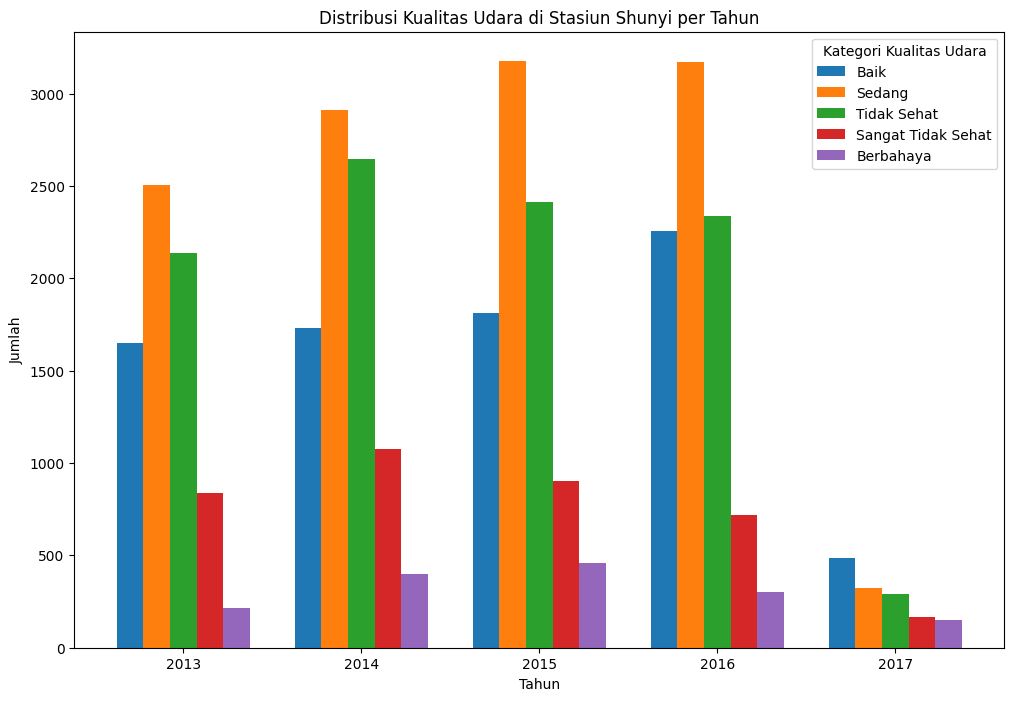

In [309]:
tabel_tahunan = pd.pivot_table(shunyi_df, values='PM2.5', index='year', columns='Kategori Kualitas Udara', aggfunc='count', fill_value=0)

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
bar_positions = np.arange(len(tabel_tahunan.index))

for i, kategori in enumerate(kualitas_udara_order):
    ax.bar(bar_positions + (i * bar_width), tabel_tahunan[kategori], width=bar_width, label=kategori)

ax.set_title('Distribusi Kualitas Udara di Stasiun Shunyi per Tahun')
ax.set_xlabel('Tahun')
ax.set_ylabel('Jumlah')
ax.set_xticks(bar_positions + (2 * bar_width))
ax.set_xticklabels(tabel_tahunan.index)
ax.legend(title='Kategori Kualitas Udara', bbox_to_anchor=(1, 1))

plt.show()

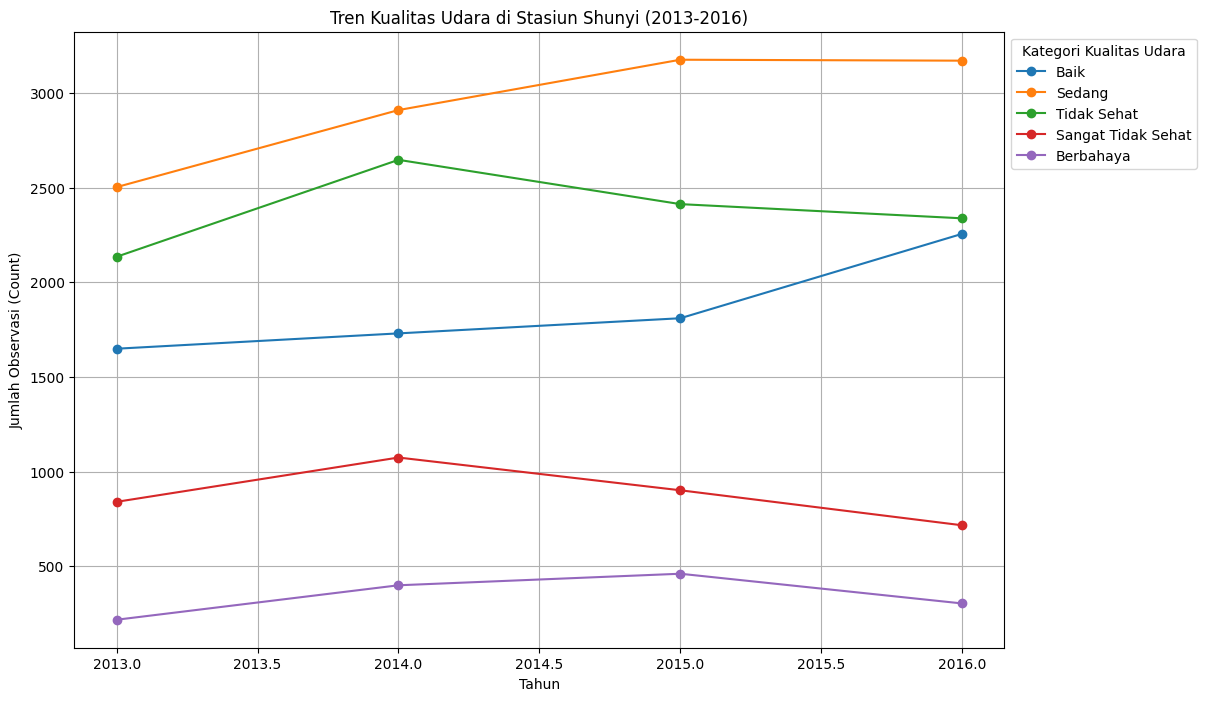

In [314]:
# Filter data untuk tahun 2013-2016
filter_data = shunyi_df[(shunyi_df['year'] >= 2013) & (shunyi_df['year'] <= 2016)]

tabel_tahunan = pd.pivot_table(filter_data, values='PM2.5', index='year', columns='Kategori Kualitas Udara', aggfunc='count', fill_value=0)
tabel_tahunan = tabel_tahunan[kualitas_udara_order].sort_index()

# Plot line chart untuk setiap kategori
fig, ax = plt.subplots(figsize=(12, 8))

for kategori in kualitas_udara_order:
    ax.plot(tabel_tahunan.index, tabel_tahunan[kategori], marker='o', label=kategori)

ax.set_title('Tren Kualitas Udara di Stasiun Shunyi (2013-2016)')
ax.set_xlabel('Tahun')
ax.set_ylabel('Jumlah Observasi (Count)')
ax.legend(title='Kategori Kualitas Udara', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Dilihat dari penurunan yang sangat jauh pada tahun 2017 di semua kategori ada kemungkinan data pada tahun tersebut kurang , Oleh karena itu untuk melihat tren kita akan berfokus pada tahun 2013 -2016

1. Jumlah observasi kategori "Sedang" dan "Tidak Sehat" cenderung meningkat dari tahun 2013 hingga 2015, tetapi kemudian mengalami penurunan pada tahun 2016.Jumlah observasi kategori "Baik" dan "Sangat Tidak Sehat" juga mengalami fluktuasi selama periode tersebut.

2. Pada tahun 2014, terjadi puncak jumlah observasi kategori "Sedang" dan "Tidak Sehat," menunjukkan kemungkinan adanya situasi pencemaran udara yang signifikan pada tahun tersebut.

3. Pada tahun 2016, terjadi peningkatan yang signifikan dalam jumlah observasi kategori "Baik," menunjukkan potensi perbaikan kualitas udara pada tahun tersebut.

4. Kategori "Berbahaya" memiliki jumlah observasi yang relatif lebih rendah dibandingkan dengan kategori "Sangat Tidak Sehat" pada semua tahun.
Meskipun demikian, kategori "Berbahaya" menunjukkan kecenderungan meningkat pada tahun 2014 dan kemudian mengalami penurunan pada tahun 2016.

### Pertanyaan 2: Apa pengaruh kondisi cuaca seperti kecepatan angin (WSPM) dan hujan (RAIN) terhadap tingkat polusi udara (PM2.5) di stasiun Shunyi?

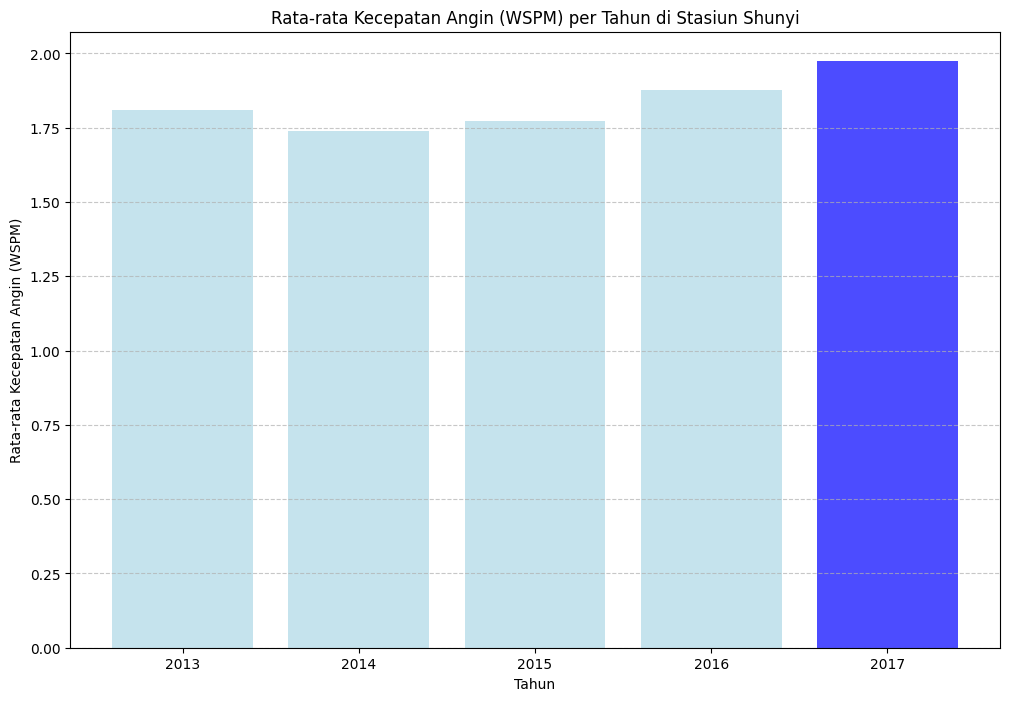

In [316]:
wspm_tabel = shunyi_df.pivot_table(values='WSPM', index='year', aggfunc='mean')

colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'blue']

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(wspm_tabel.index, wspm_tabel['WSPM'], color=colors, alpha=0.7)

ax.set_title('Rata-rata Kecepatan Angin (WSPM) per Tahun di Stasiun Shunyi')
ax.set_xlabel('Tahun')
ax.set_ylabel('Rata-rata Kecepatan Angin (WSPM)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

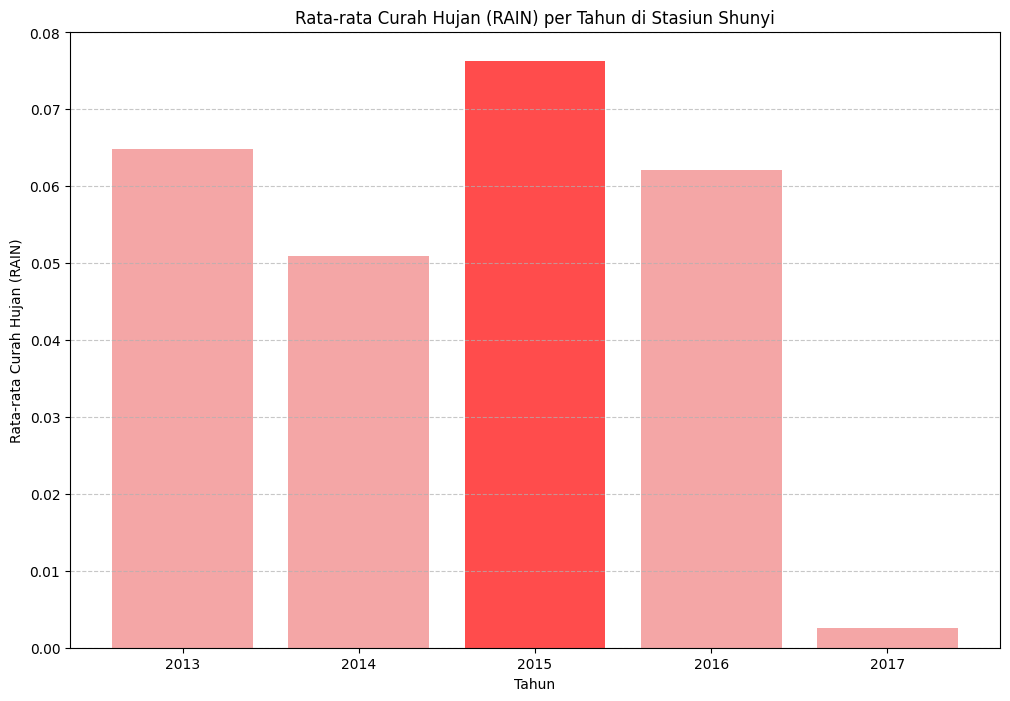

In [319]:
rain_tabel = shunyi_df.pivot_table(values='RAIN', index='year', aggfunc='mean')

colors = ['lightcoral', 'lightcoral', 'red', 'lightcoral', 'lightcoral']

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(rain_tabel.index, rain_tabel['RAIN'], color=colors, alpha=0.7)

ax.set_title('Rata-rata Curah Hujan (RAIN) per Tahun di Stasiun Shunyi')
ax.set_xlabel('Tahun')
ax.set_ylabel('Rata-rata Curah Hujan (RAIN)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

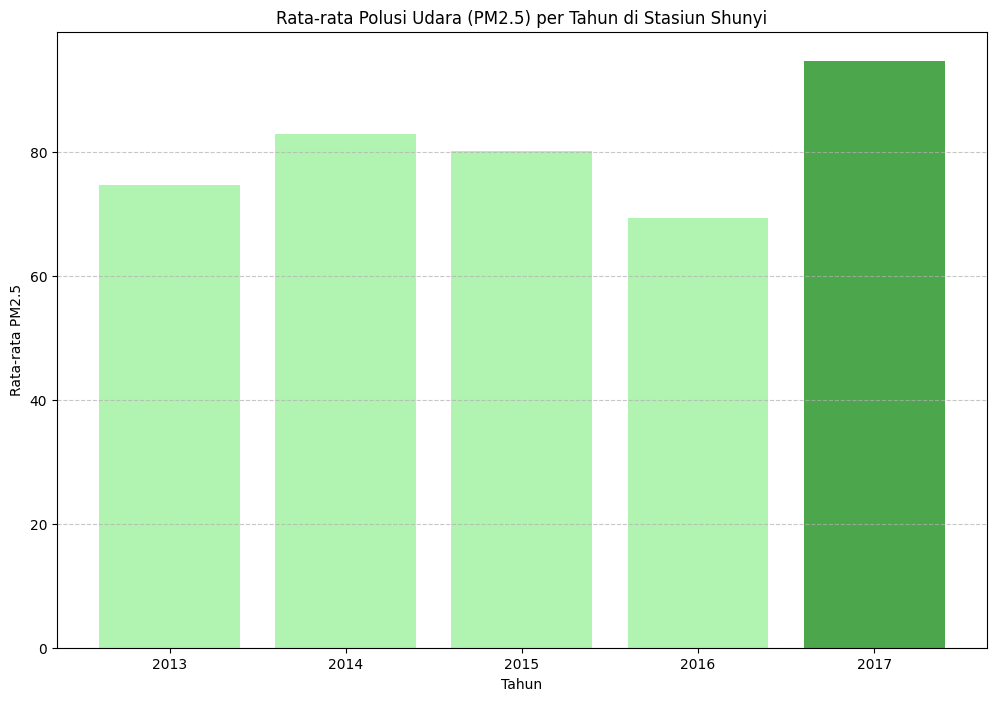

In [320]:
pm25_tabel = shunyi_df.pivot_table(values='PM2.5', index='year', aggfunc='mean')

colors = ['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'green']

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(pm25_tabel.index, pm25_tabel['PM2.5'], color=colors, alpha=0.7)

ax.set_title('Rata-rata Polusi Udara (PM2.5) per Tahun di Stasiun Shunyi')
ax.set_xlabel('Tahun')
ax.set_ylabel('Rata-rata PM2.5')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

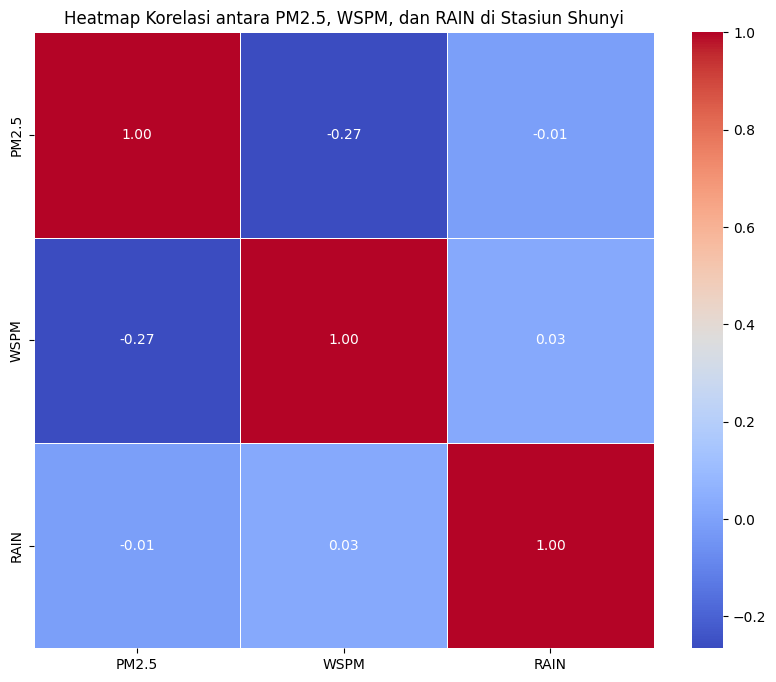

In [323]:
wspm_rain_pm25_cor = ['PM2.5', 'WSPM', 'RAIN']
correlation_mat = shunyi_df[wspm_rain_pm25_cor].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antara PM2.5, WSPM, dan RAIN di Stasiun Shunyi')
plt.show()

1. Korelasi antara WSPM dan RAIN (WSPM - RAIN):
Nilai korelasi sangat kecil (0.03), menunjukkan hubungan positif yang sangat lemah antara WSPM dan RAIN. Artinya, tidak terdapat korelasi kuat yang dapat diandalkan antara peningkatan kecepatan angin dengan peningkatan curah hujan atau sebaliknya.

2. Korelasi antara WSPM dan PM2.5 (WSPM - PM2.5):
Nilai korelasi adalah -0.27, menunjukkan hubungan negatif yang moderat antara WSPM dan PM2.5. Ini menunjukkan bahwa ketika nilai WSPM meningkat, nilai PM2.5 cenderung menurun. Dengan kata lain, saat kecepatan angin meningkat, konsentrasi PM2.5 cenderung menurun.

3. Korelasi antara RAIN dan PM2.5 (RAIN - PM2.5):
Nilai korelasi sangat kecil (-0.01), menunjukkan hubungan negatif yang sangat lemah antara RAIN dan PM2.5. Meskipun negatif, korelasi ini sangat dekat dengan nol, menunjukkan bahwa tidak ada hubungan linier yang kuat antara curah hujan dan PM2.5. 

## Conclusion

1. Jumlah observasi pada kategori "Sedang" dan "Tidak Sehat" cenderung meningkat dari tahun 2013 hingga 2015, namun kemudian mengalami penurunan pada tahun 2016. Fluktuasi juga terlihat pada kategori "Baik" dan "Sangat Tidak Sehat" selama periode tersebut. Pada tahun 2014, terjadi puncak jumlah observasi kategori "Sedang" dan "Tidak Sehat," menunjukkan potensi adanya situasi pencemaran udara yang signifikan pada tahun tersebut. Namun, pada tahun 2016, terjadi peningkatan yang signifikan dalam jumlah observasi kategori "Baik," memberikan indikasi perbaikan potensial dalam kualitas udara pada tahun tersebut. Meskipun kategori "Berbahaya" memiliki jumlah observasi yang relatif lebih rendah dibandingkan dengan "Sangat Tidak Sehat," terdapat kecenderungan peningkatan pada tahun 2014 dan penurunan pada tahun 2016.

2.  Terdapat hubungan yang lemah antara variabel-variabel tersebut. Korelasi antara WSPM dan RAIN sangat kecil (0.03), menunjukkan hubungan positif yang sangat lemah, mengindikasikan bahwa peningkatan kecepatan angin tidak secara signifikan terkait dengan peningkatan curah hujan atau sebaliknya. Korelasi antara WSPM dan PM2.5 adalah -0.27, menandakan hubungan negatif yang moderat; dengan kata lain, saat kecepatan angin meningkat, konsentrasi PM2.5 cenderung menurun. Sementara itu, korelasi antara RAIN dan PM2.5 sangat kecil (-0.01), menunjukkan hubungan negatif yang sangat lemah antara curah hujan dan konsentrasi PM2.5, walaupun tidak signifikan secara linier.

In [302]:
shunyi_df.to_csv("shunyi_cleaned.csv", index=False)